<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Viewing-an-image" data-toc-modified-id="Viewing-an-image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Viewing an image</a></span><ul class="toc-item"><li><span><a href="#Examining-the-pixel-values" data-toc-modified-id="Examining-the-pixel-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examining the pixel values</a></span></li></ul></li><li><span><a href="#Training-out-model" data-toc-modified-id="Training-out-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training out model</a></span></li><li><span><a href="#Retraining-our-model" data-toc-modified-id="Retraining-our-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Retraining our model</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
%matplotlib inline

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Loading the data

* We use panda's read_csv to read train.csv into a dataframe.
* Then we separate our images and labels for supervised learning.
* We also do a train_test_split to break our data into two sets, one for training and one for testing. This lets us measure how well our model was trained by later inputting some known test data.


In [2]:
labeled_images = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Machine Learning/Kaggle/train.csv")

In [3]:
images = labeled_images.iloc[0:5000, 1:]
labels = labeled_images.iloc[0:5000, :1]

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state = 0)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Viewing an image

Text(0.5,1,'6')

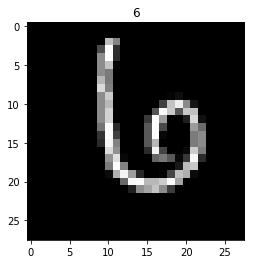

In [4]:
i = 1
img = train_images.iloc[i].as_matrix()
img = img.reshape((28, 28))
plt.imshow(img, cmap = "gray")
plt.title(train_labels.iloc[i,0])

### Examining the pixel values

> Note: These images are not black and white (0,1). They are gray-scale (0-255).

* A histogram of this image's pixel values shows the range.

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

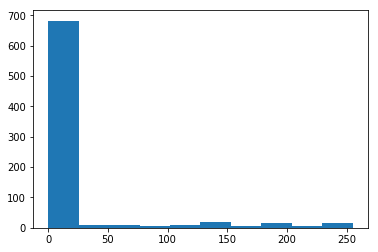

In [5]:
plt.hist(train_images.iloc[i])

## Training out model

In [6]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.10000000000000001

**How did our model do?**

> You should have gotten around 0.10, or 10% accuracy. This is terrible. 10% accuracy is what we get if we randomly guess a number. There are many ways to improve this, including not using a vector classifier, but here's a simple one to start. Let's just simplify our images by making them true black and white.

>> * To make this easy, any pixel with a value simply becomes 1 and everything else remains 0.

>> * We'll plot the same image again to see how it looks now that it's black and white. Look at the histogram now.

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is tr

Text(0.5,1,'label    6\nName: 3275, dtype: int64')

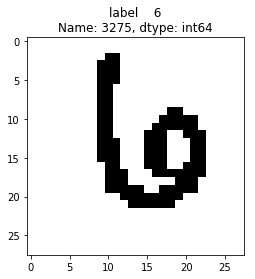

In [7]:
test_images[test_images > 0] = 1
train_images[train_images > 0] = 1

img = train_images.iloc[i].as_matrix().reshape((28, 28))
plt.imshow(img, cmap = "binary")
plt.title(train_labels.iloc[i])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

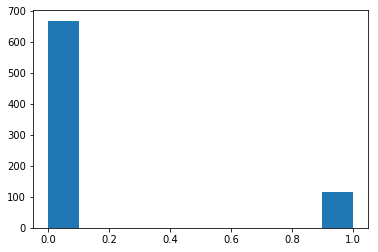

In [8]:
plt.hist(train_images.iloc[i])

## Retraining our model

In [9]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.88700000000000001

In [10]:
confusion_matrix(test_images, test_labels)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets